<a href="https://colab.research.google.com/github/Angelaruiga/python_/blob/main/Analisis_infartos_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
import io
from google.colab import files

# Descripción del Dataset

**Variables**

- `age` -> edad en años


- `sex` -> M = masculino; F = femenino


- `ChestPainType` -> tipo de dolor de pecho


    - TA: Angina típica: dolor en el pecho relacionado con la disminución del suministro de sangre al corazón
    
    - ATA: Angina atípica: dolor en el pecho no relacionado con el corazón
    
    - NAP: No dolor de angina: típicamente espasmos esofágicos (no relacionados con el corazón)
    
    - ASY: Asintomáticos: dolor en el pecho que no muestra signos de enfermedad
    
- `RestingBP` -> resultados del electrocardiograma

    - Normal: Normal
    
    - ST: tener una anormalidad de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV)
    
    - LVH:  que muestren una hipertrofia ventricular izquierda probable o definida según los criterios de Estes  
    

- `Cholesterol` -> colesterol sérico en mg/dl

    - suero = LDL + HDL + .2 * trigliceridos
    
    - por encima de 200 es motivo de preocupación
    
- `FastingBS` -> (glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

    - '>126' mg/dL señal de diabetes
'Normal', 'ST', 'LVH'


- `RestingECG` -> resto resultados electrocardiograma

    - Normal: nada que destacar
    
    - ST:  anomralidad en la curva:
        - puede variar desde síntomas leves hasta problemas graves
        - señales de latidos cardíacos no normales
        
    - LVH: hipertrofia ventricular izquierda posible o definitiva
        - Agrandamiento de la cámara de bombeo principal del corazón
        
        
- `MaxHR` -> frecuencia cardíaca máxima alcanzada


- `Exercise Angina` -> agina inducida por ejercicio

    - 1 = si
    
    - 0 = no


- `oldpeak` -> la depresión del ST inducida por el ejercicio en relación con el reposo examina el estrés del corazón durante el ejercicio Un corazón poco saludable se estresará más


- `ST-Slope` -> la pendiente del segmento ST máximo del ejercicio

    - Up: Pendiente ascendente: mejora de la frecuencia cardíaca con el ejercicio (poco común)
    
    - Flat: Pendiente plana: cambio mínimo (corazón sano típico)
    
    - Down: Pendiente descendente: signos de un corazón poco saludable

    
    
- `HeartDisease` -> si ha tenido infarto o no (la variable respuesta).

    - 1 = si
    - 0 = no


# Carga de datos  

In [ ]:
# from google

uploaded = files.upload()

Saving heart.csv to heart (3).csv


In [ ]:
# cargamos el dataset

## En Google Colab

df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head(3)

# Desde Local

#df = pd.read_csv("heart.csv")
#df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


# Análisis exploratorio,  EDA

In [ ]:
# Cuantas filas y columnas tenemos
df.shape

(918, 12)

In [ ]:
# Cuántos valores nulos tenemos en el dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Cuántos valores nulos tenemos en el dataset
df.duplicated().sum()

0

📌 Parece que el dataset está muy limpio!!! **NO** tenemos valores nulos ni duplicados 🙃

In [ ]:
# Exploramos los tipos de los datos que tenemos
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
df["FastingBS"] = df["FastingBS"].astype("category")

In [ ]:
df.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS         category
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
dtype: object

In [ ]:
# exploramos variables categóricas

df.describe(include  = ["object", "category"]).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


## Análisis exploratorio visual

En este apartado se realizarán una serie de gráficos para entender el problema y entender cuales son las principales características que determinan que una persona sufra un infarto de corazón o no. Para ello, se usará la visualización a través de las herramientas de seaborn y matplotlib

### Variable respuesta

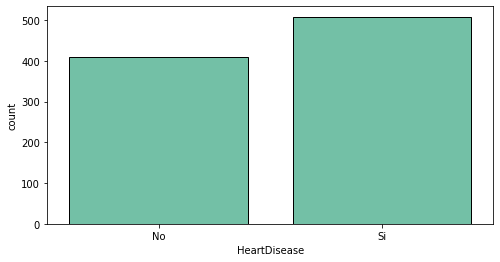

In [ ]:
plt.figure(figsize=(8, 4))

fig1 = sns.countplot(data=df, x= 'HeartDisease', color= 'mediumaquamarine', edgecolor='black')
fig1.set(xticklabels=['No', 'Si'])

plt.show;

In [ ]:
df['HeartDisease'].value_counts() / df.shape[0]

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

### Variables catégoricas

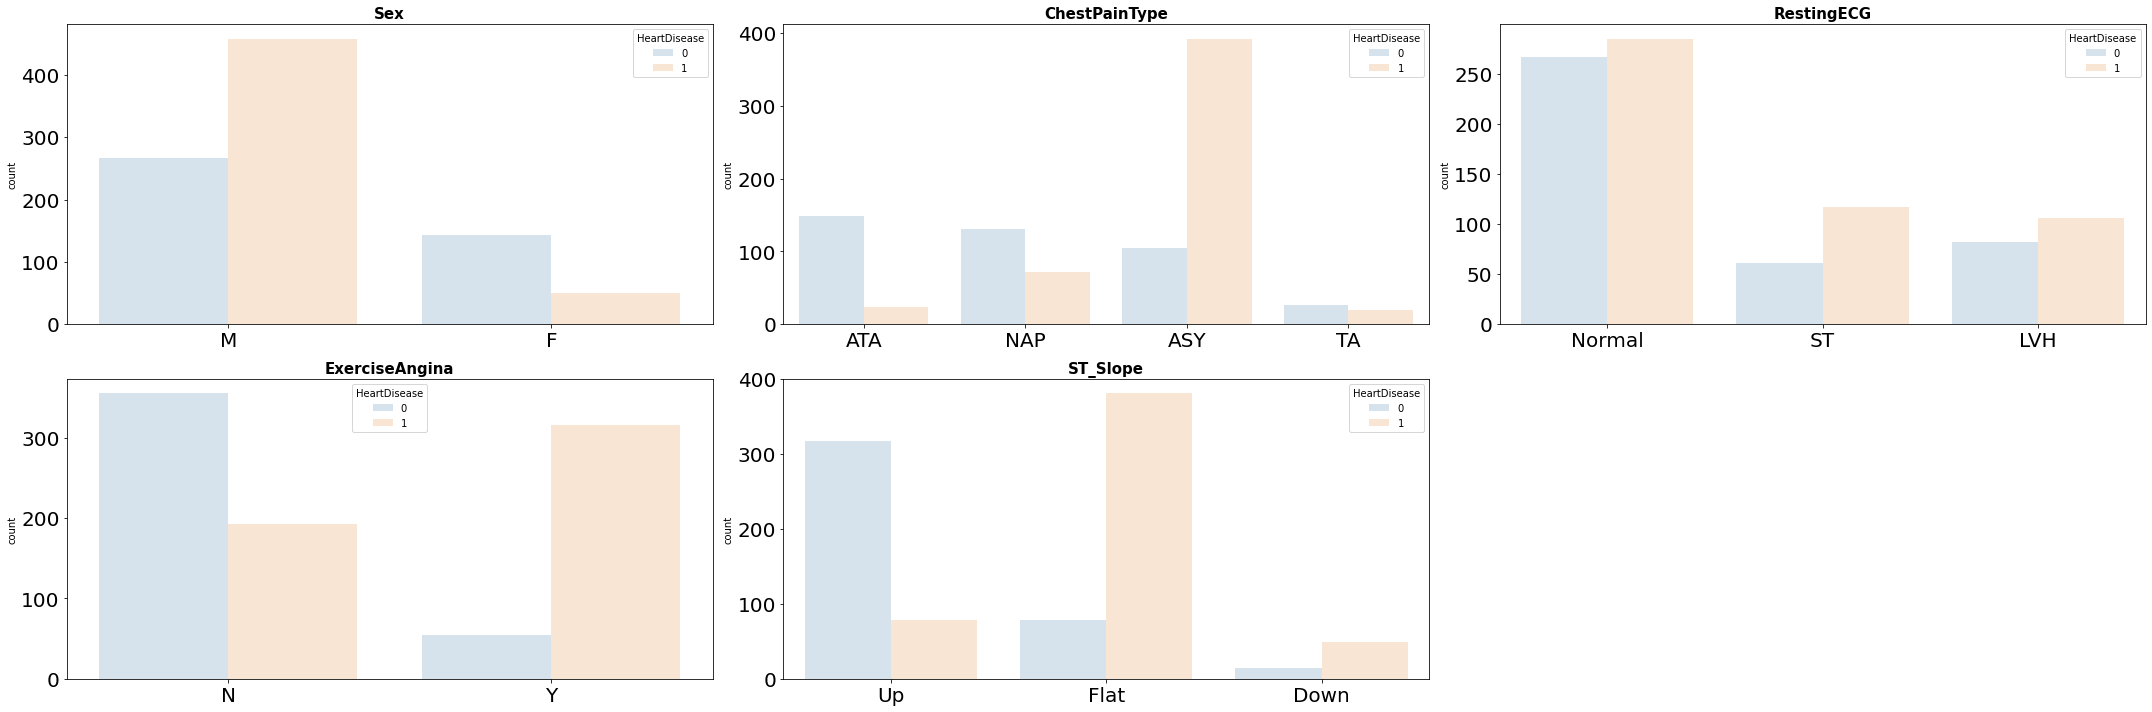

In [ ]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df,
        x = colum,
        hue = "HeartDisease",
        alpha = 0.2,
        ax = axes[i])


    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

**Resumen**
> Las principales conclusiones del análisis de variables categóricas son:
> - Observando el tipo de `dolor torácico (CP)`, las personas sin enfermedad parecen tener muchos menos casos en las variaciones 1, 2 y 3, y los pacientes con la enfermedad tienden a tener un valor de 0, que son casos asintomáticos.
> - Un tipo de resultado similar es el de la `angina de pecho` inducida por el ejercicio, con un 80% de pacientes sin enfermedad cardíaca que no la padecen por hacer demasiado ejercicio.
> - Los resultados del `electrocardiograma` en reposo son bastante interesantes. Hay alrededor de un 10% más de personas con una enfermedad cardíaca declarada que tienen una hipertrofia ventricular izquierda definida. Y alrededor de un 40% más de personas sin enfermedad cardíaca tienen un restecg normal.
> - Los `FastingBS` parecen tener las mismas proporciones tanto para los pacientes con cardiopatía como para los que no la padecen.
> - Los pacientes no llegan al hospital resultado de un ejercicio intenso (ExerciseAngina)


###  Variables continuas

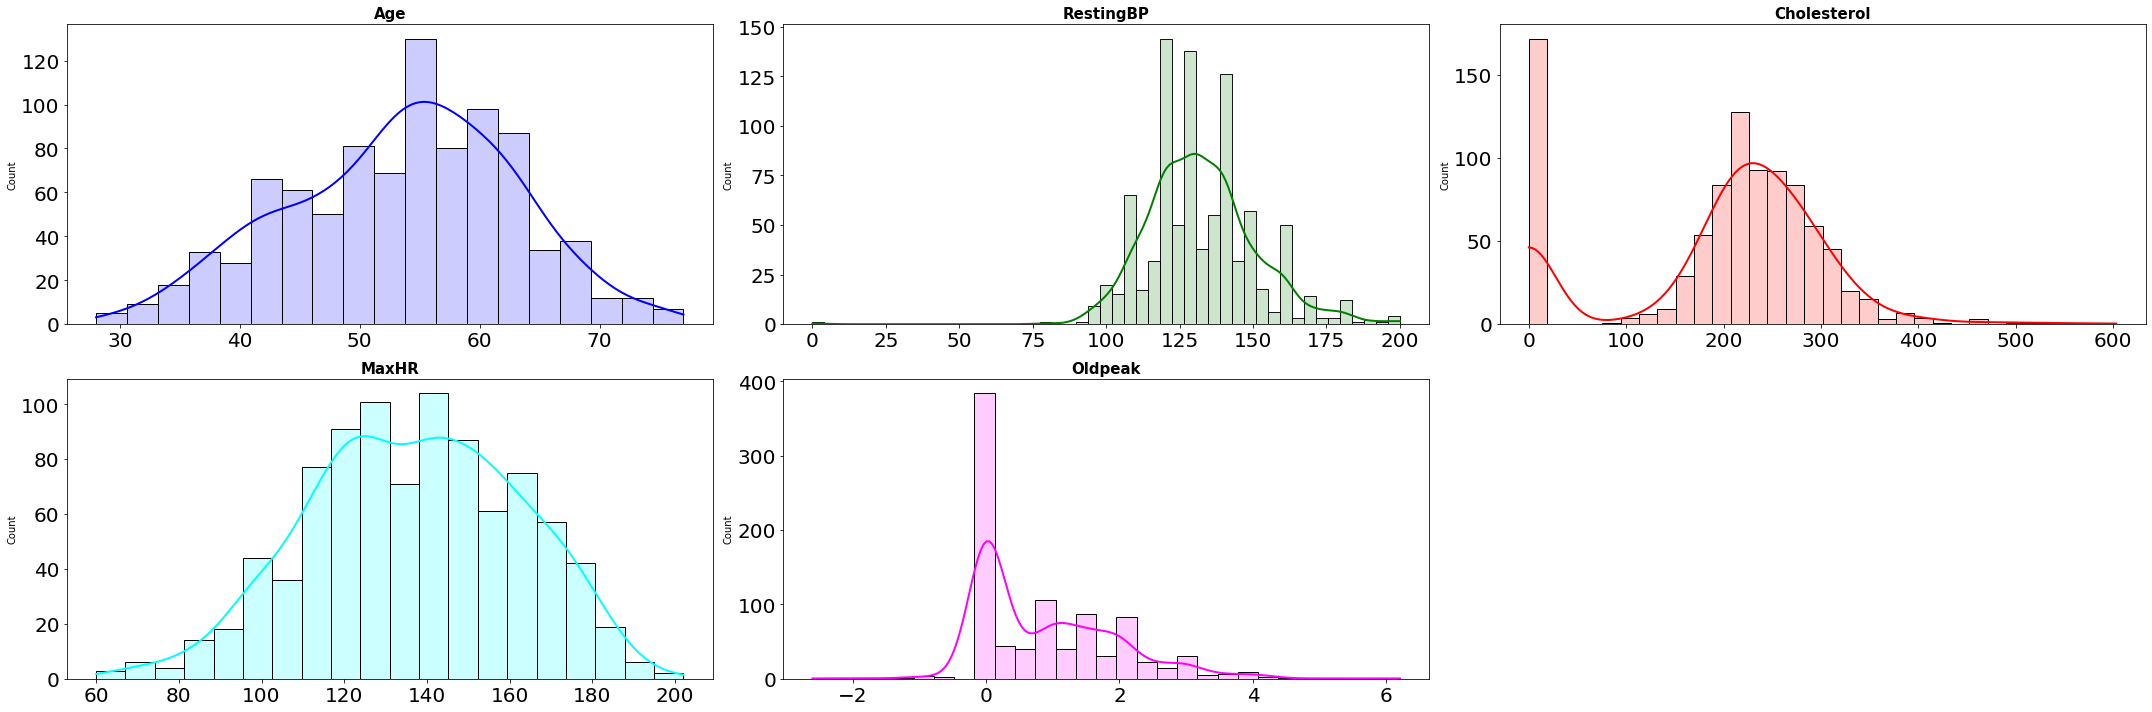

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("HeartDisease")

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data = df,
        x = colum,
        kde = True,
        color = lista_colores[i],
        line_kws = {"linewidth": 2},
        alpha = 0.2,
        ax = axes[i])


    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")



fig.delaxes(axes[5])

fig.tight_layout();

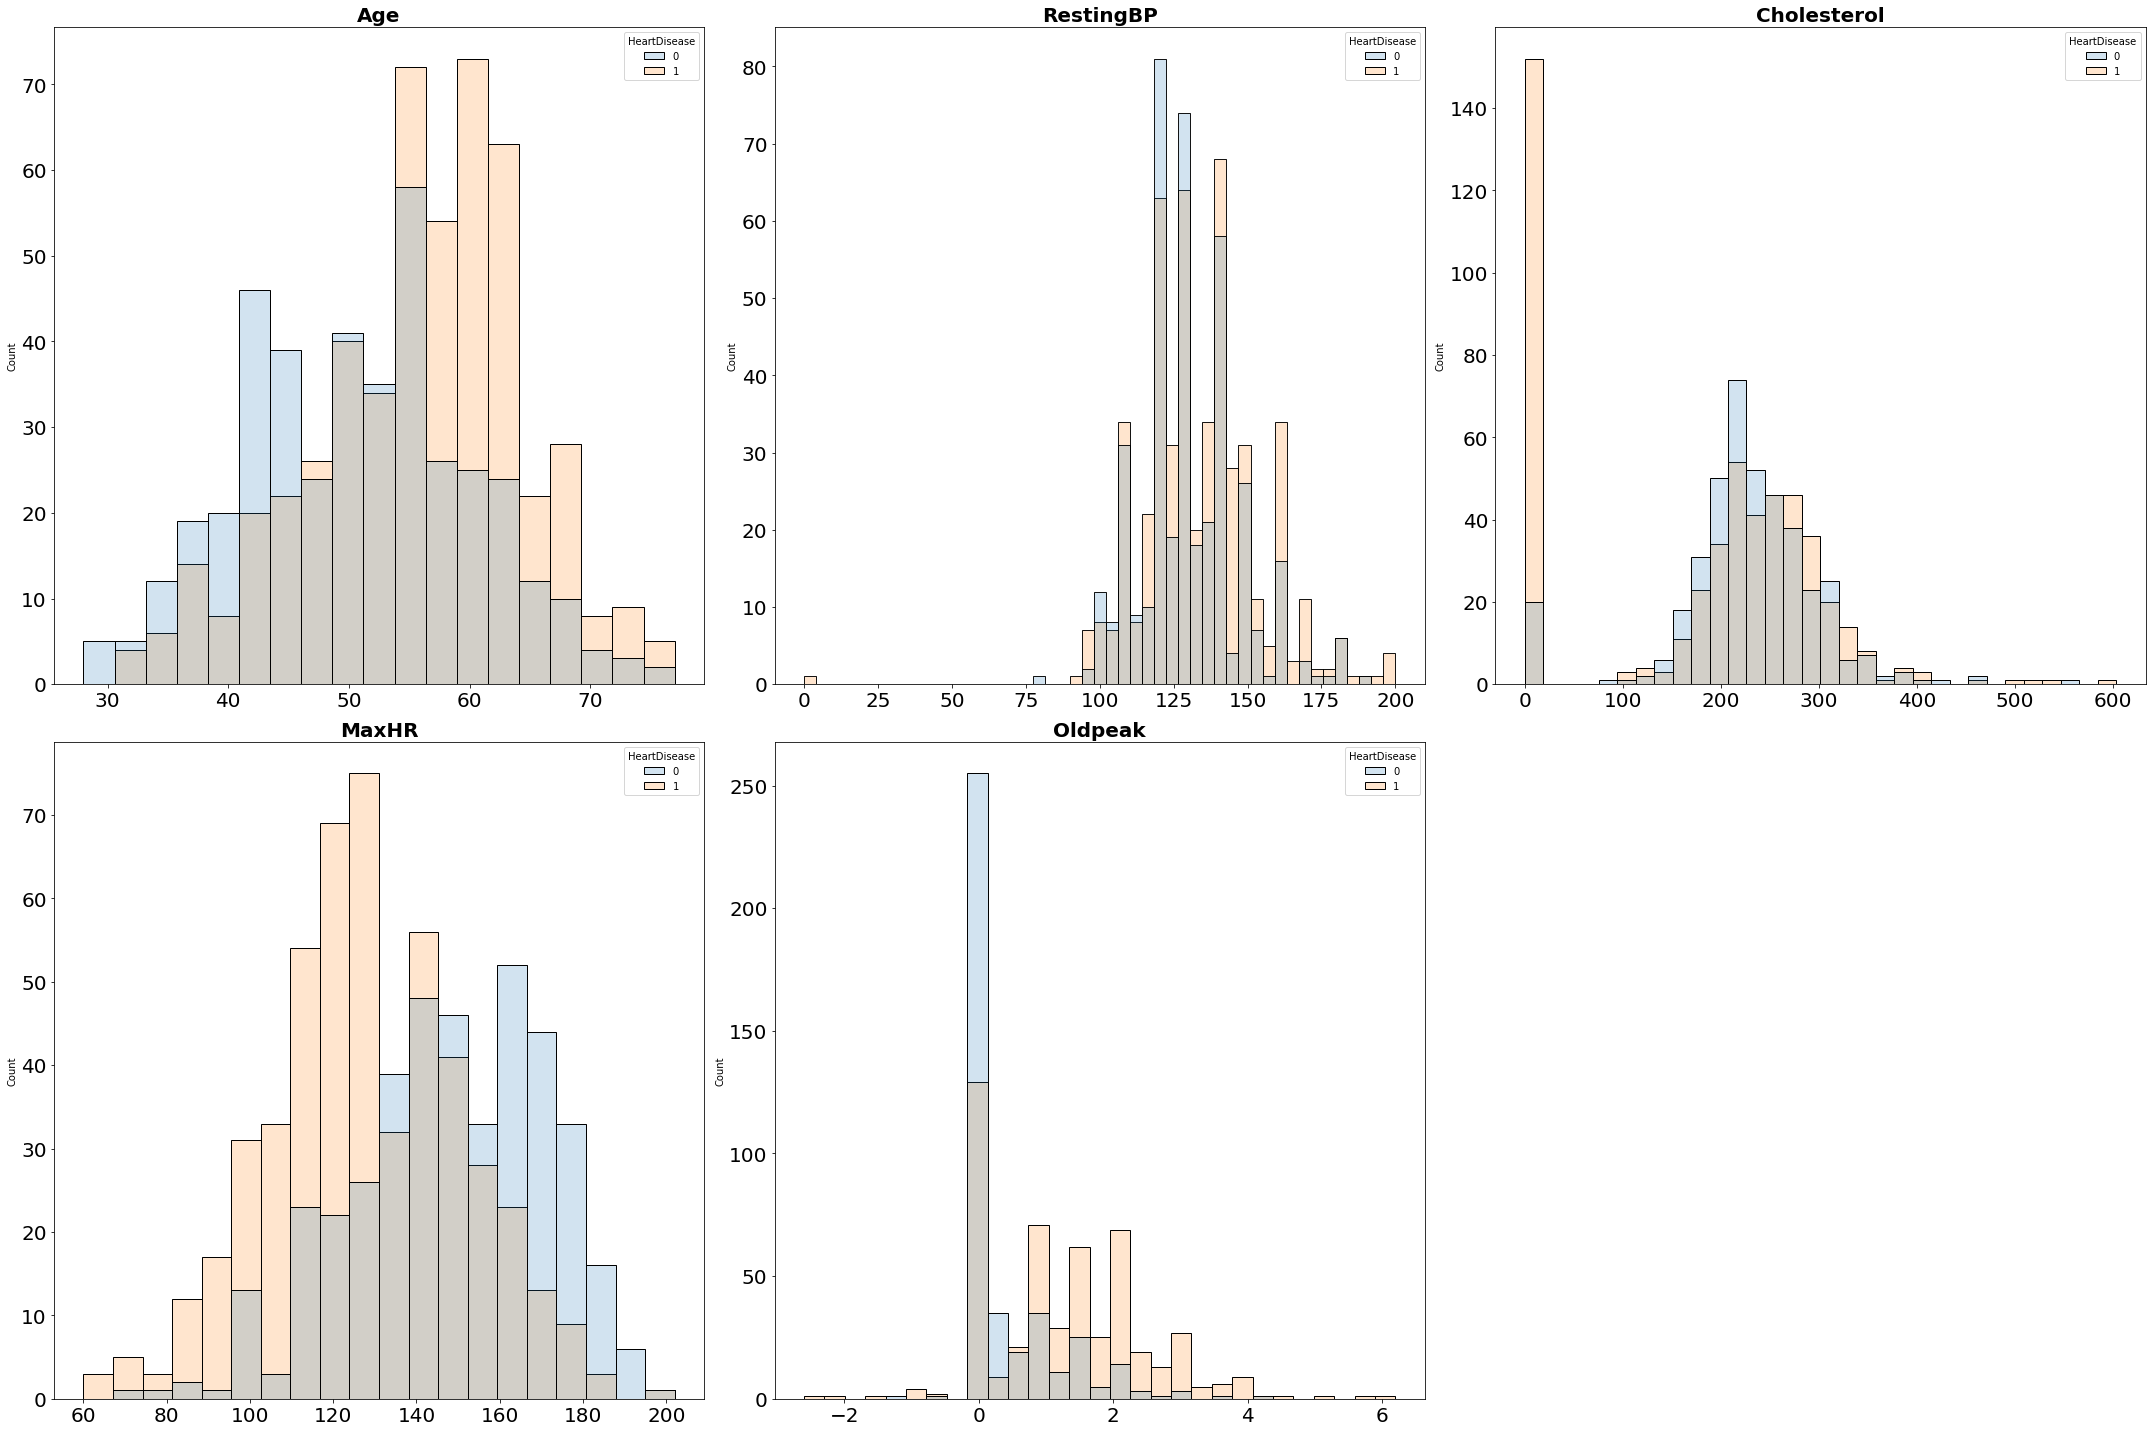

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("HeartDisease")

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data = df,
        x = colum,
        hue = "HeartDisease",
        color = lista_colores[i],
        line_kws = {"linewidth": 2},
        alpha = 0.2,
        ax = axes[i])


    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


fig.delaxes(axes[5])

fig.tight_layout();

## Gráfico de correlación  o *Heatmap*

In [ ]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0
3,48,138,214,108,1.5,1
4,54,150,195,122,0.0,0


In [ ]:
correlation = df_numericas.corr()
correlation

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148,-0.232741
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,-0.400421,0.403951,1.000000


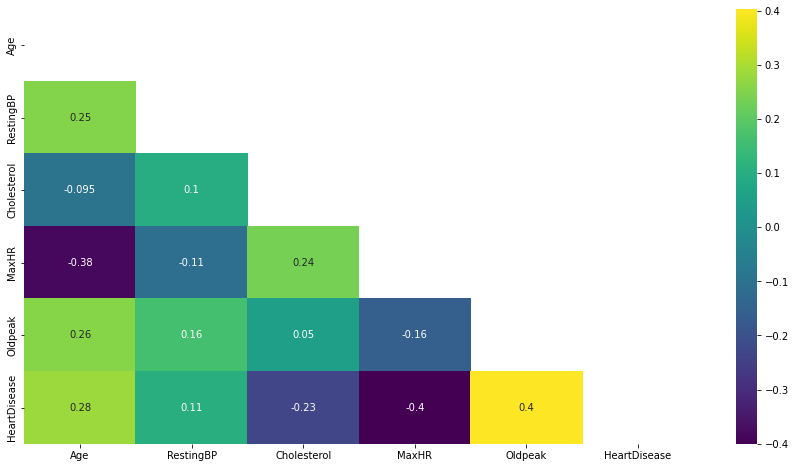

In [ ]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral